In [1]:
import numpy as np
from math import pi
from gdshelpers.geometry.chip import Cell
from gdshelpers.parts.waveguide import Waveguide
from gdshelpers.parts.coupler import GratingCoupler
from gdshelpers.parts.resonator import RingResonator
from gdshelpers.parts.splitter import Splitter
from gdshelpers.layout import GridLayout
from gdshelpers.parts.marker import CrossMarker
from gdshelpers.parts.marker import SquareMarker
from gdshelpers.helpers.positive_resist import convert_to_positive_resist
from gdshelpers.parts.port import Port
from shapely.geometry import Polygon
from shapely.affinity import scale
from shapely.affinity import translate
from shapely.affinity import rotate
from gdshelpers.geometry import geometric_union
from gdshelpers.helpers.under_etching import create_holes_for_under_etching
from gdshelpers.geometry.ebl_frame_generators import raith_marker_frame
from gdshelpers.parts.text import Text
from shapely.geometry import Point
import importlib
import aco_components1
importlib.reload(aco_components1)

<module 'aco_components1' from '/Users/haoqindeng/Desktop/MoLiGroup/IDT_gds/aco_components1.py'>

/opt/miniconda3/envs/torch/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


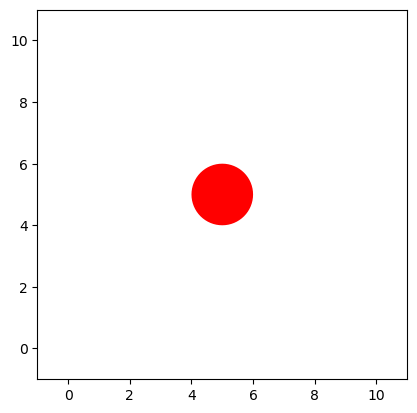

In [2]:
cell = Cell('racetrack')
point = Point(5, 5)
point_inflated = point.buffer(1.)
cell.add_to_layer(1, point_inflated)
cell.show()

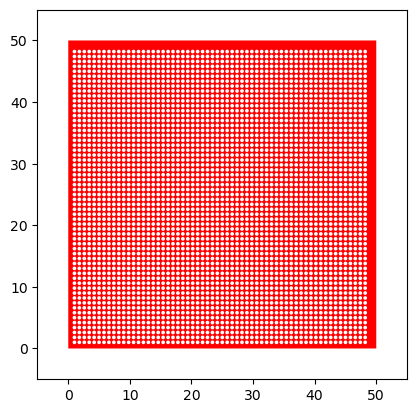

In [38]:
cell = Cell('dots')
pitch=0.8
radius = 0.3

pos_x = 1
pos_y = 1

canvas = Polygon([(0,0), (0, 50), (50, 50), (50, 0)])

# for i in range(60):
#     pos_y = 1
#     for j in range(60):
#         point = Point(pos_x, pos_y)
#         point_inflated = point.buffer(radius)
#         if (i==0 and j==0):
#             nanodisk_array = point_inflated
#         else:
#             nanodisk_array = geometric_union([nanodisk_array, point_inflated])
#         pos_y += pitch
#     pos_x += pitch
# canvas = canvas.difference(nanodisk_array)

cell.add_to_layer(1, canvas)
cell.show()


In [ ]:
cell.save('PCM/PCM_nanodisk_background.gds')

In [39]:
cell.save('PCM/PCM_nanodisk_' + 'r=' + str(radius) + '_p=' + str(pitch))

/opt/miniconda3/envs/torch/lib/python3.9/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/opt/miniconda3/envs/torch/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/miniconda3/envs/torch/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


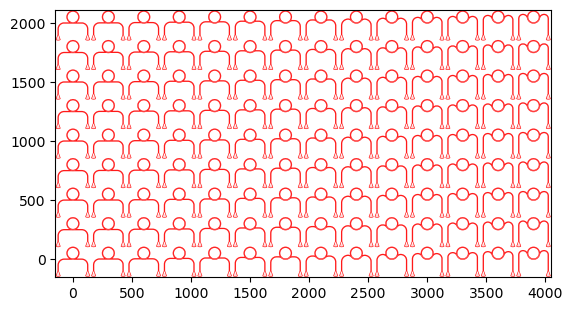

In [68]:
cell = Cell('racetrack')
pos_x = 0
pos_y = 0
# te0_coupling_len_list = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

coupling_len_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
wg_width_list = [0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94]
# te0_coupling_len_list = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
for coupling_len in coupling_len_list:
    pos_y = 0
    # pos_x = 0
    for wg_width in wg_width_list:
        cell = aco_components1.make_poly_ring(cell, coupling_len=coupling_len, offset=(pos_x, pos_y))
        pos_y += 250
    pos_x += 300

cell.show()

In [69]:
cell.save('SOS_Char/polyring.gds')

/opt/miniconda3/envs/torch/lib/python3.9/site-packages/gdshelpers/geometry/shapely_adapter.py:116: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  poly._gdsh_n_points = len(poly.exterior.coords) + sum([len(shapely.geometry.LinearRing(x).coords) for x
